In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from dateutil import parser
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [2]:
# Store filepath in a variable
file_one = Path("historical-property-sales-data.csv")

In [3]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
properties_original_df = pd.read_csv(file_one, encoding="ISO-8859-1")
properties_original_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,875754.0,Residential,3.633019e+09,1923 W 19TH CT,NaN,4.0,3040.0,Ranch,Aluminum/Vinyl,1.0,1970.0,5.0,"1,104",1.0,3.0,1.0,1.0,"1,018",9/8/2021,"$165,000"
1,850364.0,Residential,4.320269e+09,1000 W MADISON ST,NaN,12.0,4040.0,Residence O/S 2sty+,Aluminum/Vinyl,2.0,1900.0,7.0,"1,394",1.0,4.0,1.0,0.0,"1,050",3/23/2020,"$90,000"
2,NaN,Residential,4.991945e+09,2443 S LENOX ST,NaN,14.0,4910.0,Cottage,Aluminum / Vinyl,1.0,1890.0,0.0,733,1.0,2.0,1.0,0.0,1050,2017-07-01,90800
3,226318.0,Residential,4.991945e+09,2443 S LENOX ST,NaN,14.0,4910.0,Cottage,Aluminum/Vinyl,1.0,1890.0,4.0,733,1.0,2.0,1.0,0.0,1050,2022-11-30,152250
4,193555.0,Residential,3.620239e+09,1621 N MAYFLOWER CT,NaN,6.0,2970.0,Townhouse,Aluminum/Vinyl,2.0,1963.0,5.0,956,1.0,3.0,1.0,0.0,1098,2022-08-15,90000


In [4]:
properties_original_df.columns

Index(['ï»¿PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject',
       'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price'],
      dtype='object')

In [5]:
properties_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿PropertyID  22335 non-null  float64
 1   PropType       37072 non-null  object 
 2   taxkey         37072 non-null  float64
 3   Address        37070 non-null  object 
 4   CondoProject   0 non-null      float64
 5   District       37071 non-null  float64
 6   nbhd           37021 non-null  float64
 7   Style          37072 non-null  object 
 8   Extwall        37067 non-null  object 
 9   Stories        37072 non-null  float64
 10  Year_Built     37072 non-null  float64
 11  Rooms          37071 non-null  float64
 12  FinishedSqft   37072 non-null  object 
 13  Units          37072 non-null  float64
 14  Bdrms          37072 non-null  float64
 15  Fbath          37072 non-null  float64
 16  Hbath          34333 non-null  float64
 17  Lotsize        37072 non-null  object 
 18  Sale_d

In [6]:
#getting only 'Residential' values
residential_properties_df = properties_original_df.loc[properties_original_df["PropType"] == 'Residential']
residential_properties_df = residential_properties_df.drop(columns=['CondoProject', 'ï»¿PropertyID','PropType','District','Extwall','nbhd','Stories','taxkey','Address','Rooms','Units'], axis=1)
residential_properties_df.isnull().sum()

Style              0
Year_Built         0
FinishedSqft       0
Bdrms              0
Fbath              0
Hbath           2738
Lotsize            0
Sale_date          0
Sale_price         8
dtype: int64

In [7]:
styles_list = ['Cape Cod','Colonial','Bi-Level','Duplex N/S','Townhouse','Dplx Bungalow','Milwaukee Bungalow','Split Level','Res O/S A & 1/2','Res O/S 2sty +','Res O/S 1 Story','Duplex O/S','Triplex','Tudor','Contemporary','Mansion','Rm or Rooming House']
filtered_residential_properties_df = residential_properties_df[residential_properties_df['Style'].isin(styles_list)]
filtered_residential_properties_df = filtered_residential_properties_df.drop('Style', axis=1)
filtered_residential_properties_df

,Year_Built,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
4,1963.0,956,3.0,1.0,0.0,1098,2022-08-15,90000
7,1929.0,870,2.0,1.0,0.0,"1,260",3/29/2021,"$180,000"
10,1918.0,1049,2.0,1.0,0.0,1350,2022-06-14,325000
12,1880.0,"1,213",3.0,1.0,1.0,"1,440",4/26/2021,"$100,000"
13,1890.0,1258,4.0,1.0,0.0,1440,2022-08-17,110000
...,...,...,...,...,...,...,...,...
37064,1912.0,"8,398",7.0,5.0,3.0,"58,650",6/15/2020,"$1,350,000"
37066,1902.0,9698,8.0,6.0,2.0,11250,2018-07-01,1350000
37068,2008.0,4405,5.0,6.0,1.0,16642,2016-07-01,525000
37069,2008.0,"4,405",5.0,6.0,1.0,"16,642",3/30/2021,"$545,000"


In [8]:
#check datatype of each column
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22729 entries, 4 to 37070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year_Built    22729 non-null  float64
 1   FinishedSqft  22729 non-null  object 
 2   Bdrms         22729 non-null  float64
 3   Fbath         22729 non-null  float64
 4   Hbath         21154 non-null  float64
 5   Lotsize       22729 non-null  object 
 6   Sale_date     22729 non-null  object 
 7   Sale_price    22724 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.6+ MB


In [9]:
filtered_residential_properties_df['Baths_total'] = filtered_residential_properties_df['Fbath'] + filtered_residential_properties_df['Hbath']
filtered_residential_properties_df = filtered_residential_properties_df.drop(columns=['Fbath','Hbath'], axis=1)
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22729 entries, 4 to 37070
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year_Built    22729 non-null  float64
 1   FinishedSqft  22729 non-null  object 
 2   Bdrms         22729 non-null  float64
 3   Lotsize       22729 non-null  object 
 4   Sale_date     22729 non-null  object 
 5   Sale_price    22724 non-null  object 
 6   Baths_total   21154 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.4+ MB


In [10]:
filtered_residential_properties_df['Sale_date'] = pd.to_datetime(filtered_residential_properties_df['Sale_date'], infer_datetime_format=True, format='mixed')
filtered_residential_properties_df['Sale_Year'] = filtered_residential_properties_df['Sale_date'].dt.year
filtered_residential_properties_df['Month'] = filtered_residential_properties_df['Sale_date'].dt.month
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22729 entries, 4 to 37070
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year_Built    22729 non-null  float64       
 1   FinishedSqft  22729 non-null  object        
 2   Bdrms         22729 non-null  float64       
 3   Lotsize       22729 non-null  object        
 4   Sale_date     22729 non-null  datetime64[ns]
 5   Sale_price    22724 non-null  object        
 6   Baths_total   21154 non-null  float64       
 7   Sale_Year     22729 non-null  int32         
 8   Month         22729 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(3)
memory usage: 1.6+ MB


C:\Users\RMessiha\AppData\Local\Temp\ipykernel_9052\4179603370.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  filtered_residential_properties_df['Sale_date'] = pd.to_datetime(filtered_residential_properties_df['Sale_date'], infer_datetime_format=True, format='mixed')


In [11]:
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['Bdrms','Baths_total','Lotsize'])
filtered_residential_properties_df.isnull().sum()

Year_Built      0
FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Sale_Year       0
Month           0
dtype: int64

In [12]:
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].astype(str)
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace('$', '')
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace(',', '')
filtered_residential_properties_df['Sale_price'] = pd.to_numeric(filtered_residential_properties_df['Sale_price']).astype(int)

filtered_residential_properties_df['Bdrms'] = pd.to_numeric(filtered_residential_properties_df['Bdrms']).astype(int)
filtered_residential_properties_df['Baths_total'] = pd.to_numeric(filtered_residential_properties_df['Baths_total']).astype(int)


filtered_residential_properties_df['FinishedSqft'] = filtered_residential_properties_df['FinishedSqft'].str.replace(',', '')
filtered_residential_properties_df['FinishedSqft'] = pd.to_numeric(filtered_residential_properties_df['FinishedSqft']).astype(int, errors='ignore')

filtered_residential_properties_df['Lotsize'] = filtered_residential_properties_df['Lotsize'].str.replace(',', '')
filtered_residential_properties_df['Lotsize'] = pd.to_numeric(filtered_residential_properties_df['Lotsize']).astype(int, errors='ignore')

In [13]:
filtered_residential_properties_df.isnull().sum()

Year_Built      0
FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Sale_Year       0
Month           0
dtype: int64

In [14]:
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['FinishedSqft','Lotsize'])
filtered_residential_properties_df.isnull().sum()

Year_Built      0
FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Sale_Year       0
Month           0
dtype: int64

In [15]:
filtered_residential_properties_df['FinishedSqft'] = pd.to_numeric(filtered_residential_properties_df['FinishedSqft']).astype(int)
filtered_residential_properties_df['Lotsize'] = pd.to_numeric(filtered_residential_properties_df['Lotsize']).astype(int)
filtered_residential_properties_df = filtered_residential_properties_df[['Bdrms','Baths_total', 'FinishedSqft', 'Lotsize', 'Sale_date','Year_Built','Sale_Year' ,'Sale_price']]
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21154 entries, 4 to 37070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Bdrms         21154 non-null  int32         
 1   Baths_total   21154 non-null  int32         
 2   FinishedSqft  21154 non-null  int32         
 3   Lotsize       21154 non-null  int32         
 4   Sale_date     21154 non-null  datetime64[ns]
 5   Year_Built    21154 non-null  float64       
 6   Sale_Year     21154 non-null  int32         
 7   Sale_price    21154 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(6)
memory usage: 991.6 KB


In [16]:
# replace '$' sign from some Sale_price values
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['Sale_price'])

filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].astype(str)
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace('$', '')
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace(',', '')
filtered_residential_properties_df['Sale_price'] = pd.to_numeric(filtered_residential_properties_df['Sale_price']).astype(int)
filtered_residential_properties_df.head()

,Bdrms,Baths_total,FinishedSqft,Lotsize,Sale_date,Year_Built,Sale_Year,Sale_price
4,3,1,956,1098,2022-08-15,1963.0,2022,90000
7,2,1,870,1260,2021-03-29,1929.0,2021,180000
10,2,1,1049,1350,2022-06-14,1918.0,2022,325000
12,3,2,1213,1440,2021-04-26,1880.0,2021,100000
13,4,1,1258,1440,2022-08-17,1890.0,2022,110000


In [18]:
filtered_residential_properties_df.to_csv("cleaned-property-sales-data.csv", encoding='utf-8',index=False)

In [ ]:
#try to find outliers
filtered_residential_properties_df.describe()[['Sale_price']]

,Sale_price
count,2.115400e+04
mean,1.924859e+05
min,8.000000e+04
25%,1.300000e+05
50%,1.700000e+05
75%,2.299000e+05
max,2.500000e+06
std,1.064140e+05


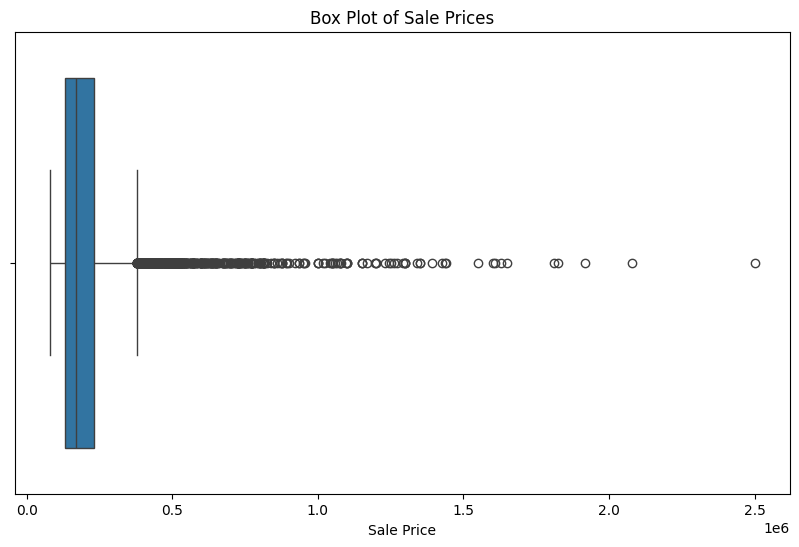

In [19]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_residential_properties_df['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_residential_properties_df['Sale_price'].quantile(0.25)
Q3 = filtered_residential_properties_df['Sale_price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = filtered_residential_properties_df[(filtered_residential_properties_df['Sale_price'] >= lower_bound) & (filtered_residential_properties_df['Sale_price'] <= upper_bound)]


# Display the DataFrame without outliers
df_no_outliers.shape

(20385, 8)

In [21]:
X = df_no_outliers["Sale_date"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([['2022-08-15T00:00:00.000000000'],
       ['2021-03-29T00:00:00.000000000'],
       ['2022-06-14T00:00:00.000000000'],
       ['2021-04-26T00:00:00.000000000'],
       ['2022-08-17T00:00:00.000000000']], dtype='datetime64[ns]')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from datetime import timedelta

In [23]:
df_no_outliers = df_no_outliers[(df_no_outliers != 0).all(axis=1)]

print(df_no_outliers)

       Bdrms  Baths_total  FinishedSqft  Lotsize  Sale_date  Year_Built  \
4          3            1           956     1098 2022-08-15      1963.0   
7          2            1           870     1260 2021-03-29      1929.0   
10         2            1          1049     1350 2022-06-14      1918.0   
12         3            2          1213     1440 2021-04-26      1880.0   
13         4            1          1258     1440 2022-08-17      1890.0   
...      ...          ...           ...      ...        ...         ...   
37034      8            5          3986     3225 2015-07-01      1885.0   
37038      5            5          1973     5390 2020-12-29      1935.0   
37041      8            5          4397     6500 2022-08-11      1928.0   
37044      6            5          2993     6735 2015-10-01      2005.0   
37063      4            5          2329    23200 2021-01-15      1956.0   

       Sale_Year  Sale_price  
4           2022       90000  
7           2021      180000  
10    

In [27]:
data=df_no_outliers.copy()
data['Sale_date'] = pd.to_datetime(data['Sale_date'])


X = data[['Bdrms', 'Baths_total', 'FinishedSqft', 'Lotsize', 'Sale_Year']]
y = data['Sale_price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 46111.09255517721


In [32]:
# Using precision score
model.score(X_test, y_test)

0.20467558083206538

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Data Preprocessing

# Load the dataset
data = pd.read_csv('cleaned-property-sales-data.csv')

# Handle missing values
imputer = SimpleImputer(strategy='mean')


# Convert 'Sale_date' to datetime
data['Sale_date'] = pd.to_datetime(data['Sale_date'])

# Convert 'Sale_date' to UNIX timestamp (numerical representation)
#data['Sale_date'] = data['Sale_date'].astype(int)


# Drop the original 'Sale_date' column
data.drop(columns=['Sale_date'], inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Sale_price'])
y = data['Sale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Selection
model = RandomForestRegressor()

# Step 3: Model Training
model.fit(X_train, y_train)

# Step 4: Model Evaluation

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 5: Prediction
# If you have new data for prediction, you can use the trained model
# For example:
# new_data = pd.read_csv('new_data.csv')
# new_predictions = model.predict(new_data)


Mean Absolute Error: 49463.47468137447
Mean Squared Error: 5419856685.020517
R-squared: 0.5320993196778261


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define a list of regression models to try
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'{name}: Mean R-squared = {scores.mean()}, Standard deviation = {scores.std()}')

Linear Regression: Mean R-squared = 0.07800402871802818, Standard deviation = 0.15793832286953266
Support Vector Regression: Mean R-squared = -0.0999236370112003, Standard deviation = 0.10446489281404835
Gradient Boosting Regression: Mean R-squared = 0.21729546093362934, Standard deviation = 0.15990183779261258


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from datetime import datetime

# Load the data
data = pd.read_csv('cleaned-property-sales-data.csv')

df = pd.DataFrame(data)

# Convert 'Sale_date' to datetime
df['Sale_date'] = [datetime.strptime(date, '%Y-%m-%d').timestamp() for date in df['Sale_date']]

# Split features and target variable
X = df.drop('Sale_price', axis=1)
y = df['Sale_price']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MAE: {mae}')


c:\Users\RMessiha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test MAE: 55449.87890625


In [39]:
from sklearn.metrics import r2_score

In [41]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_test) 
 
cb_r2_score=r2_score(y_test, preds)
cb_r2_score

Learning rate set to 0.064015
0:	learn: 103661.0740302	total: 3.52ms	remaining: 3.51s
1:	learn: 101258.5354106	total: 6.92ms	remaining: 3.46s
2:	learn: 99089.1055112	total: 12.2ms	remaining: 4.07s
3:	learn: 97104.7212590	total: 21.6ms	remaining: 5.37s
4:	learn: 95326.8646902	total: 24.9ms	remaining: 4.96s
5:	learn: 93722.0091387	total: 32.1ms	remaining: 5.31s
6:	learn: 92267.3420241	total: 36.5ms	remaining: 5.18s
7:	learn: 90909.4603889	total: 40ms	remaining: 4.95s
8:	learn: 89585.0378953	total: 44.4ms	remaining: 4.89s
9:	learn: 88439.5355040	total: 49.4ms	remaining: 4.89s
10:	learn: 87311.7011821	total: 52.2ms	remaining: 4.69s
11:	learn: 86427.6125311	total: 55.5ms	remaining: 4.57s
12:	learn: 85593.3752779	total: 60.4ms	remaining: 4.59s
13:	learn: 84732.0878936	total: 64.6ms	remaining: 4.55s
14:	learn: 83947.1759926	total: 67.5ms	remaining: 4.43s
15:	learn: 83212.1336796	total: 71.4ms	remaining: 4.39s
16:	learn: 82537.3660343	total: 79ms	remaining: 4.57s
17:	learn: 81934.3519090	total

0.5397905494486033